In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from category_encoders.ordinal import OrdinalEncoder
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score

from sklearn.model_selection import RandomizedSearchCV

import scipy as sp


pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


In [2]:
train_data = pd.read_csv('./data/train_features.csv')
train_y = pd.read_csv('./data/train_labels.csv')

test_data = pd.read_csv('./data/test_features.csv')

In [3]:
#for i in list(train_data.columns):
#    print(i)
#    print(train_data[i].isnull().sum()
train_y['status_group'].value_counts()
a = 32259 + 22824 + 4317

print(32259/a)
print(22824/a)
print(4317/a)

0.543080808080808
0.3842424242424242
0.07267676767676767


In [4]:
###Features to use 
features = ['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'basin',
 'region',
 'region_code',
 'district_code',
 'lga',
 'population',
 'public_meeting',
 'scheme_management',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type']

In [5]:
cat_features = [
 'basin',
 'region',
 'lga',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type']


In [6]:
train_data = train_data[features]
test_data = test_data[features]

In [7]:
ce_ord = OrdinalEncoder(cols='status_group')
train_y['status'] = ce_ord.fit_transform(train_y)['status_group']
#train_y.head(5)
#test_y['status'] = ce_ord.fit_transform(test_y)['status_group']

In [8]:
ce_ord = OrdinalEncoder(cols=cat_features)
#e_ord.fit_transform(train_y)# ['status_group']
#train_y.head(5)

In [9]:
train_data = ce_ord.fit_transform(train_data)
test_data = ce_ord.fit_transform(test_data)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_y[['id', 'status']], test_size=0.20, random_state=42)

In [11]:
#train_data

In [12]:
linear = linear_model.LogisticRegression()
linear = RandomForestClassifier(n_estimators=1000, max_depth=1125, n_jobs=6, verbose = 1)
linear.fit(X_train,y_train['status'])
linear.score(X_train,y_train['status'])

linear.fit(X_train,y_train['status'])
print(linear.score(X_train,y_train['status']))

print(linear.score(X_test,y_test['status']))
#print('Coeff: ', linear.coef_)
#print('Inter: ', linear.intercept_)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   16.8s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:   21.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    3.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    3.9s
[Paral

1.0


[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.9s finished


0.8056397306397306


AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [13]:
importances = pd.Series(linear.feature_importances_, X_train.columns)
print (importances)

id                       0.097046
amount_tsh               0.024832
gps_height               0.062199
longitude                0.122640
latitude                 0.120425
num_private              0.001534
basin                    0.015621
region                   0.019073
region_code              0.017196
district_code            0.021765
lga                      0.030535
population               0.042902
public_meeting           0.010085
scheme_management        0.014940
permit                   0.010273
construction_year        0.051846
extraction_type          0.029214
extraction_type_group    0.028023
extraction_type_class    0.031248
management               0.014797
management_group         0.006508
payment                  0.016983
payment_type             0.017238
water_quality            0.009103
quality_group            0.009248
quantity                 0.103379
source                   0.023773
source_class             0.008297
waterpoint_type          0.039279
dtype: float64

In [19]:
linear.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

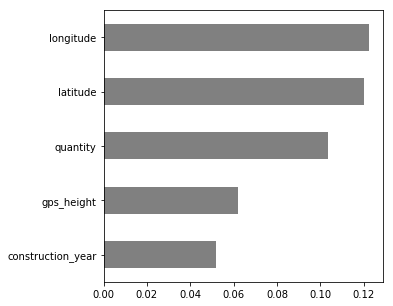

In [14]:
n = 5#len(X_train.columns)
figsize = (5,5)

top_n = importances.drop('id').sort_values()[-n:]
plt.figure(figsize=figsize)
top_n.plot.barh(color='gray');

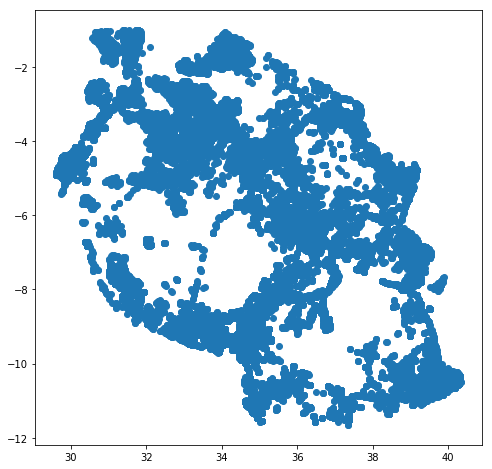

In [34]:
#train_data.loc['longitude' == 0]
#df[df.line_race != 0]
plt.figure(figsize=(8,8))
plt.scatter(train_data['longitude'].loc[train_data['longitude'] != 0], train_data['latitude'].loc[train_data['longitude'] != 0])#, color=train_data['gps_height'])


In [ ]:
#ETC = ExtraTreesClassifier(n_estimators=40,  max_depth=40, 
#                           min_samples_split=2, min_samples_leaf=2, 
#                           min_weight_fraction_leaf=0.0, 
#                           max_leaf_nodes=2500, min_impurity_decrease=0.0, 
#                           min_impurity_split=None, bootstrap=True, 
#                           n_jobs=6, random_state=42, verbose=0, warm_start=True)

#ETC.fit(X_train,y_train['status'])
#print(ETC.score(X_train,y_train['status']))1
#print(ETC.score(X_test,y_test['status']))


In [ ]:
#GBC = GradientBoostingClassifier(learning_rate=0.5, n_estimators=5, 
#                           subsample=1.0, min_samples_split=5, 
#                           min_samples_leaf=3, min_weight_fraction_leaf=0.000001, 
#                           max_depth=50, min_impurity_decrease=0.0, 
#                           min_impurity_split=None, init=None, random_state=42, 
#                           max_features=None, verbose=10, max_leaf_nodes=None, 
#                           warm_start=False, validation_fraction=0.1, 
#                           n_iter_no_change=1, tol=0.00001)
#GBC.fit(X_train,y_train['status'])
#print(GBC.score(X_train,y_train['status']))
#print(GBC.score(X_test,y_test['status']))
#print('\n')
#print(jaccard_similarity_score(y_train['status'], GBC.predict(X_train)))
#print(jaccard_similarity_score(y_test['status'], GBC.predict(X_test)))

In [ ]:
#GBC.get_params()

In [ ]:
#n_searches = 1500
#params = {
# 'learning_rate': [0.1,0.2],#,0.8],
# 'max_depth': range(3000,4000,200),#[100, 215, 150],#, 1750, 2000],#15,20, 50, 80, ,20,25,30,35,40],
# 'min_samples_leaf': [1,2,3,4,5],
# 'min_samples_split': [1,2,3,4,5],
# 'n_estimators': range(2000,3000,200)#,25,30,35,40],
# }

#RSCV = RandomizedSearchCV(estimator = RandomForestClassifier(), n_iter = n_searches, n_jobs = 6, verbose = 1, param_distributions= params)

#RSCV.fit(X_train,y_train['status'])

#print(RSCV.score(X_train,y_train['status']))
#print(RSCV.score(X_test,y_test['status']))

In [ ]:
test_Output = linear.predict(test_data)
Submission_Output = pd.DataFrame()
Submission_Output['id'] = test_data['id']
Submission_Output['Status'] = list(test_Output)

Submission_Output['Status_Output'] = Submission_Output['Status'].replace( {1:'functional', 2:'non functional', 3:'functional needs repair'})# ,axis = 0)
print(Submission_Output['Status_Output'].value_counts())

Subcsv = pd.DataFrame()
Subcsv['id'] = Submission_Output['id']
Subcsv['status_group'] = Submission_Output['Status_Output']
#Subcsv.to_csv('./RSCVsubmit12.csv')